In [1]:
pip install SALib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.0 MB/s eta 0:00:00


In [2]:
import numpy as np
from SALib.sample import saltelli
from SALib.analyze import sobol
from scipy.stats import norm
import matplotlib.pyplot as plt


In [3]:
# Define your model function
def model_function(x):
    # Example model: quadratic function
    return x[:, 0]**2 + x[:, 1]**2 + 0.1 * np.random.randn(len(x))

In [4]:
# Define the input parameters and their ranges
problem = {
    'num_vars': 2,
    'names': ['x1', 'x2'],
    'bounds': [[-1, 1], [-1, 1]]
}

In [5]:
# Generate samples using Sobol sequence
param_values = saltelli.sample(problem, 1000)

<ipython-input-5-e44d9c44297c>:2: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 1000)
/usr/local/lib/python3.10/dist-packages/SALib/sample/saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1000) is equal to `2^n`.
        
  warnings.warn(msg)


In [6]:
# Run the model for each set of parameter values
output_values = model_function(param_values)

In [7]:
# Perform Sobol sensitivity analysis
sobol_indices = sobol.analyze(problem, output_values)

In [8]:
# Print the sensitivity indices
print("First-order indices:", sobol_indices['S1'])
print("Total-order indices:", sobol_indices['ST'])

First-order indices: [0.47890382 0.46160066]
Total-order indices: [0.52364258 0.54833197]


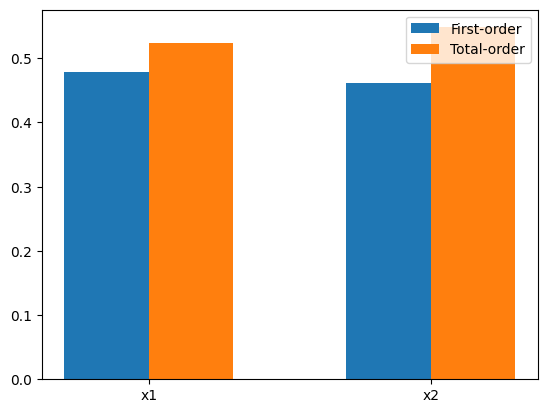

In [10]:
# Plot the results
fig, ax = plt.subplots()
bar_width = 0.30
bar_positions = np.arange(len(problem['names']))
ax.bar(bar_positions - bar_width / 2, sobol_indices['S1'], bar_width, label='First-order')
ax.bar(bar_positions + bar_width / 2, sobol_indices['ST'], bar_width, label='Total-order')
ax.set_xticks(bar_positions)
ax.set_xticklabels(problem['names'])
ax.legend()
plt.show()